# Python Machine Learning 1
# Simple Linear Regression
## *By Sal Lascano*

*This is the very first notebook on this Machine learning journey. My goal is to go step by step through all the important topics, try explaining them as much as I can, hence I will learn more about them. For this series of notebooks I will reffer to the lessons I received about Machine Learning while attending the Data Science Bootcamp at NYCDSA.*

Lets start by loading some of the packages that we know we will use.

In [1]:
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

# Linear Regression 

Linear Regression is the analysis that assesses wether one or multiple variables explain the dependent variable. It is a supervised machine learning method which allows us to mathematically model the relationship between two or more variables. 

- One or more Explanatory/Independent variables => $X_1, X_2, X_3,...,X_p$
- The Response/Dependent variables => $Y$

**Simple Linear Regression** is the case where there is only one independent variable $X$, it can be replesented as:

$$
Y=\beta_0 + \beta_1X + \epsilon
$$

- $\beta_0$ = $Y$-Intercept population paramenter
- $\beta_1$ = Slope population parameter 
- $\epsilon$ = The error, unexplained variation in $Y$

## Lets start with our topic for this notebook
# Simple Linear Regression

Lets start by visualizing our own example on Simple Linear Regression.

Lets say you are a waiter at a pub in NYC. We know that tips are normally related to the amount of the bill. You would like to make a regression that can predict the amount of the tip to expect for a given bill amount.  

One evening you gather your data of all the transactions you made that night. Turns out you made 20 transactions that night.

In [2]:
#Lets create a list of your 20 transactions with random numbers as your tips for that night
#We will use random seed to be able to get the same numbers every time we invoke random.seed(18) using numpy
np.random.seed(18)
#Lets get 20 random numbers from 5 to 30 using randint
tips = np.random.randint(5,30,20)
tips

array([15, 24, 29, 10, 22, 19, 23,  7, 13, 29,  7, 22, 10, 26, 20, 15, 15,
       25, 26, 16])

Lets see how our data points are distributed where y is equal to 0 (undefined yet) and x equals to our tips

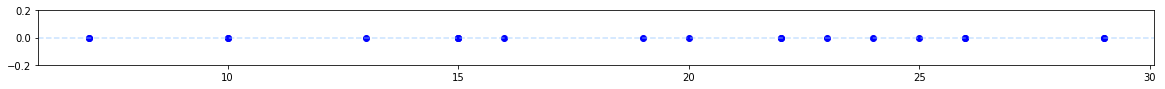

In [3]:
#Set the size of the plot for x at 20 so it can fit in my screen and y to 1 since for this example y is a constant
plt.figure(figsize=(20, 1))

#Scatter plot aligning our tips in the x axis with a list of 0's with the lenght of our tips for the y axis
plt.scatter(tips, np.zeros(len(tips)), color='blue')

#Limits of y at -2, 2
plt.ylim(-0.2, 0.2)

#Dashed line to be able to see our Y intersect
plt.axhline(y=0, alpha=0.5, ls='dashed')

#lets see what we got!
plt.show()

For this example we are going to assume that $Y = 1 + 2X$ were by looking at the previous definition of the formula $\beta_0 = 1$ ($Y$ intercept) and $\beta_1 = 2$ (The slope of the line)

In [4]:
#Lets set our variables
B_0 = 1
B_1 = 2
Y = B_0 + B_1*tips
#Since we made sure that our tips were in an array format we were able to get an array of our Y value. 
#NOTE: This would have not worked if our tips were a list
#Check the Docs of the attributes of the array if need a reminder https://docs.python.org/3.1/library/array.html

Lets plot this graph. 

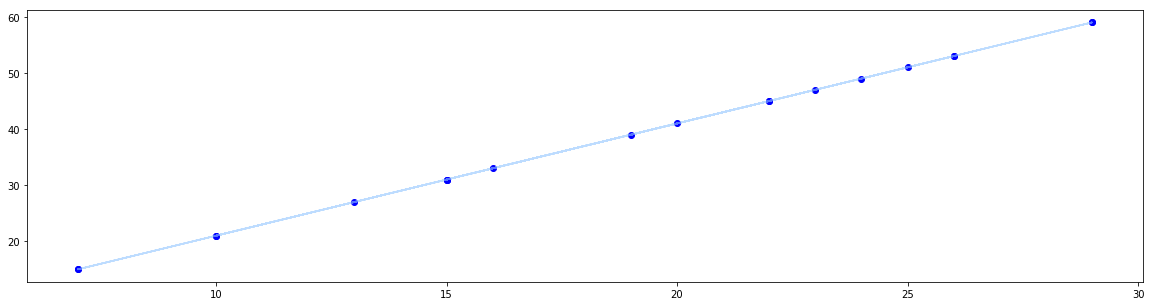

In [5]:
#Set up the size, now we set our Y to be 10, much bigger than previously because now our Y axis has multiple values
figure = plt.figure(figsize=(20, 5))

#Plot our coordenate points using the information of our tips and Y values
plt.scatter(tips, Y, figure=figure, color='blue')

#Run a line that will go through our points
plt.plot(tips, Y, figure=figure, alpha=0.6)

#Lets see!
plt.show()

Okay! so in a perfect world the graph above will be the ideal linear regression, see how the line passes through every single point? that means that the model fits perfectly and that our $R^2$ is equal to 1. We will get to $R^2$ in a little bit.

BUT! in the graph above there is no randomness. There are no errors, and we know that there are many factors that affect $Y$. Linear Regression does not account for all factors that affect $Y$, hence there will be errors. 

Lets incorporate some errors in our example. 

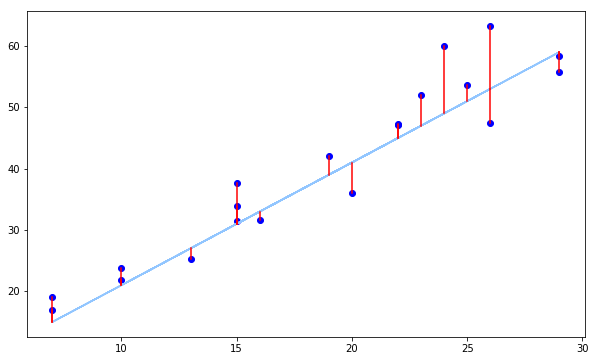

In [6]:
#Recall we set the seed at 18 so we get the same numbers everythime? we are going to use it now. 
np.random.seed(18)
#Lets create 20 errors (since we have 20 observations) the errors will go from -5 to 5 using normal which will 
#give us random numbers but in a normal distribution
E= np.random.normal(0, 5, 20)
#Lets add the error to the linear regression formula
Y = B_0 + B_1*tips + E
#Set the size of the plot
figure = plt.figure(figsize=(10, 6))
#Plot tips against our new Y (with errors this time) See something different about our points?
plt.scatter(tips, Y, color='blue')
#Plot line, with no errors so it stays the same
plt.plot(tips, B_0+B_1*tips)
#Lets graph our errors using a for loop that will make a single red line from the point to the line for every point
for i in range(20):
    #Here we will plot the lines in a very sleek way
    #We will use the fallowing format plot([a,b], [c,d]) which plots a line that will go from the 
    #Coordinates (a,c) to (b,d)
    plt.plot([tips[i], tips[i]], [B_0+B_1*tips[i], Y[i]], color='red')
#Lets GO!
plt.show()

Now that we have our graph done, lets try and make some sense of it.

## Assumptions of Linear Regression

In order to successfully justify the use of linear regression models, we need to make sure that we have the fallowing assumptions:

- Linearity
- Normality
- Constant Variance 
- Independent Errors

If any of these assumptions is violated, the outcome of the model can be inefficient, biased or misleading. 

### Linearity


Linear regression needs the relationship of $X$ (independent variable) and $Y$ (dependent variable) to be linear. It is very important to check(eliminate) outliers because linear regression is very sensitive to their effect.

#### Violations of Linearity : 
If you fit a model on data that is not linear, the chances of the outcome to be in serious error are great. 

#### Diagnosis:
We can test linearity with scatter plots as we see in the graph below. The points should be simmetrically distributed around a straight line (Regression line)

<img class="rg_ic rg_i" data-src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjUT_Rk5-h-9PxHsr0pEFttR7cKfiIW4GkFD3GevzO56sfDwBmig" jsaction="load:str.tbn" alt="Image result for non-linearity examples" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" style="width: 327px; height: 154px; margin-left: 0px; margin-right: 0px; margin-top: 0px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjUT_Rk5-h-9PxHsr0pEFttR7cKfiIW4GkFD3GevzO56sfDwBmig">

### Normality

Linear regression requires all the variables to be multivariate normal in the distribution of it's errors

#### Violations of Normality

Sometimes the distribution of the erros can be skewed by the precense of outliers which can disproportionate the influence of the parameters. 

If the errors are not normally distributed, we can use a non-linear transformation to sove this issue for us. Non-linear transformations such as log-transformations, box cox, etc...

#### Diagnosis:
We can check normality by ploting a histogram of the errors were the mean is the regression line. If we assume that the errors are normally distributed, we should see a graph similar to the below.  

<img class="rg_ic rg_i" id="3Tu_gs57vYsQSM:" jsaction="load:str.tbn" alt="Image result for gaussian distribution histogram" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" style="width: 260px; height: 186px; margin-left: 0px; margin-right: 0px; margin-top: 0px;" src="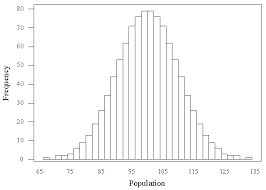">

Lets use our tips example to visualize the normality of its errors. Now we only have 20 observations in our example and we are going to need more to actually see a distribution. Lets see how we work that out. 

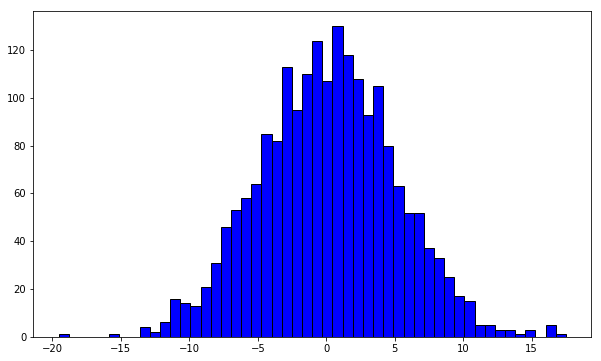

In [7]:
#Set the seed at 180 so can re-use the same numbers at a later stage
np.random.seed(180)
#Use normal to get 2000 normally distributed errors from -5 to 5
e = np.random.normal(0, 5, 2000)
#Set the size of the plot
plt.figure(figsize=(10, 6))
#Plot a histogram of the errors
plt.hist(e, color='blue', edgecolor='black', bins=50)
#Lets see
plt.show()

Now, Lets remember that it is always key to delete outliers since they can make a huge negative impact in our Linear Regression.

In this case we will assign the values of e to ee and then remove the outliers of ee since we will want to use the original e later on.

In [8]:
ee=e

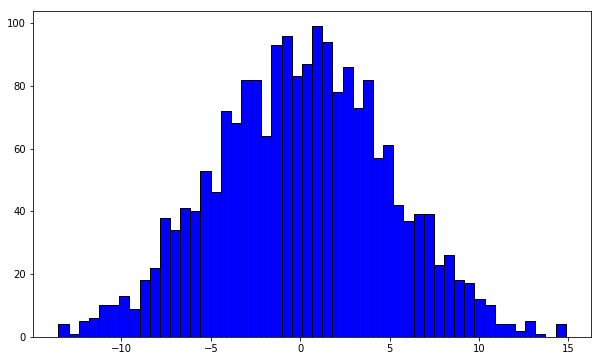

In [10]:
#Lets remove all outliers, the parameter will be to remove all numbers lower than -15 and higher than 15
#Set a variable (pos_outliers) that finds the locations in the array of all numbers higher than 15
pos_outliers = np.argwhere(ee>15)
#Set a variable (neg_outliers) that finds the locations in the array of all numbers lower than -15
neg_outliers = np.argwhere(ee<-15)
#In error array, find locations of positive outliers and delete those numbers 
ee=np.delete(ee,pos_outliers)
#Same for negative outliers in our array
ee=np.delete(ee,neg_outliers)
#Set the size of the plot
plt.figure(figsize=(10, 6))
#Plot histogram of the errors with no outliers
plt.hist(ee, color='blue', edgecolor='black', bins=50)
#GO!
plt.show()

This looks much better doesnt it? it looks like we can see an actual bell curve.

### Constant Variance (Homoscedasticity)
Constant/same variance of the errors. This descrives the situation were the variance of the errors is the same across all values of the independent variable.  

### Heteroscedasticity (Violation of constant variance)
When the size of the errors differ across values of the independent variable. It gives to much weight to small subsets of the data when estimatting coefficients. 

### Diangosis:
We can check homoscedasticity by ploting the error $\epsilon$ against the predicted value $Y$ or in the case of a timeline we can plot residuals $\epsilon$ against time. In our case with our tips eercise we will use $\epsilon$ vs. $Y$. As you can see below, the data looks as if you would have shot it out of a gunshot, there are no obvious patterns and the points are equally distributed above, below, left and right. 

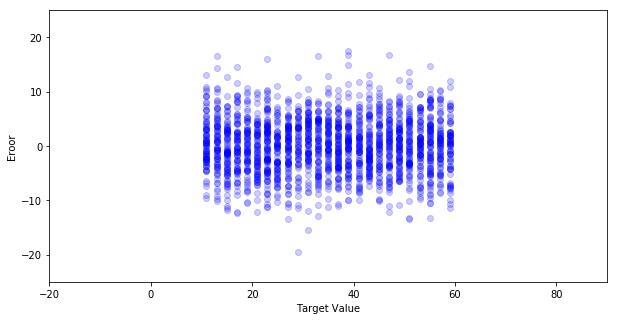

In [92]:
#Set the size of the plot
plt.figure(figsize=(10, 5))
#Use random seed 180 to get same numbers as previous examples
np.random.seed(180)
#Lets get 2000 random numbers from 5 to 30 using randint for our tips as t
t = np.random.randint(5,30,2000)
#b0 and b1 stay the same as previous, we will just change the names of the variables to not get confused 
b0 = 1
b1 = 2
y = b0 + b1 * t
#Plot the errorsagains the target  
plt.scatter(y, e, alpha = 0.2, color = 'blue')
#Name the Y & X axis 
plt.ylabel('Eroor')
plt.xlabel('Target Value')
#Set limits of X & Y to have a better visual of the outcome 
plt.ylim(-25,25)
plt.xlim(-20,90)
#lets see 
plt.show()

The graph below gives us examples of residuals with heteroscedasticity that show some obvious patterns. 

<img class="irc_mi" src="https://i.stack.imgur.com/m9OBB.png" alt="Image result for non constant variance" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" width="273" height="379" style="margin-top: 0px;">

### Independent Errors

There should be no correlation between errors, in particular in the cases of time series data.

### Violations:
In our example non-independent errors can occur when each error tends to have the same value under a particular condition.
In time series non-independent errors can occur when each error is related to its immediate predecesor. In the example below the imediate predecesor of day ten is year nine and so on.  

### Diagnosis:
Similar to Homoscedasticity diagnosis we can check by ploting the error $\epsilon$ against the predicted value $Y$ or in the case of a timeline series we can plot residuals $\epsilon$ against time.

If our example was a timeline, lets say 2000 days (since we have 2000 tips) we would plot $\epsilon$ against all the numbers from 1 to 2000. The plot would look like the below. Similar to our original example, there are no obvious patterns.

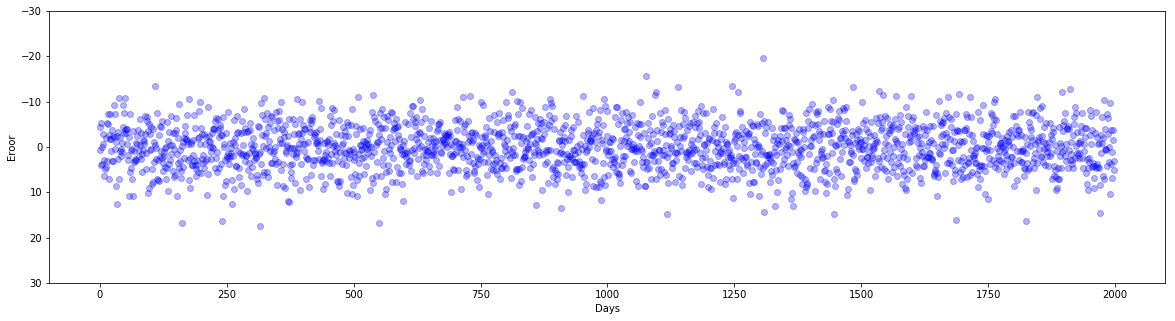

In [12]:
#Size of the plot 
plt.figure(figsize=(20, 5))
#Plot the error against all numbers from 0 to 1999
plt.scatter(np.arange(len(e)), e, alpha = 0.3, color = 'blue')
#Name the Y & X axis 
plt.ylabel('Eroor')
plt.xlabel('Days')
#Set limits of Y to have a better visual of the outcome 
plt.ylim(30,-30)
#Go graph!
plt.show()

# Estimating the Coefficients and Constants
Lets remember our linear regression formula $Y = \beta_0 + \beta_1X + \epsilon$. In general when we start working on a problem, all we are given to are the observations $X$ and $Y$ but not the constant $\beta_0$ and the coefficient $\beta_1$.

Fundamentally, after visualizing our observations in a scatter plot, what we do to find $\beta_0$ and $\beta_1$ is  try all possible pairs until we find the one that plots the linear model most similar to the observations. 

Lets remember our example with only 20 tips.

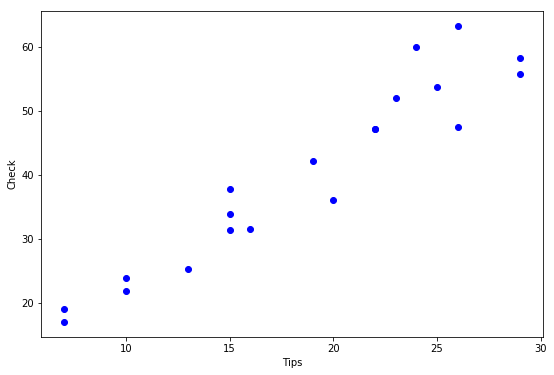

In [13]:
#If this code below confuses you, you can scroll up, the code is explained line by line earlier in the notebook. 
np.random.seed(18)
E= np.random.normal(0, 5, 20)
Y = B_0 + B_1*tips + E
figure = plt.figure(figsize=(9, 6))
plt.scatter(tips, Y, color='blue')
plt.xlabel('Tips')
plt.ylabel('Check')
plt.show()

Now lets try a (random) pair of $( \tilde{\beta}_0, \tilde{\beta}_1)$ lets say (20, 0.8). We proceed to graph the line, and how far away the errors are from it. 

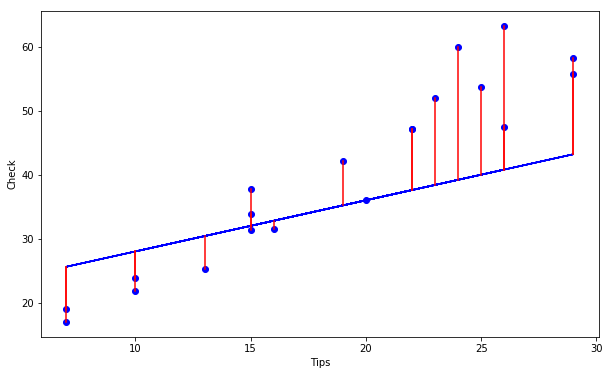

In [79]:
#If this code below confuses you, you can scroll up, the code is explained line by line earlier in the notebook. 
#The only thing we are changing here are the values of the coefficients and their names
#From B_0 to b0 and from B_1 to b1
b0=20
b1=0.8
figure = plt.figure(figsize=(10, 6))
plt.scatter(tips, Y, color='blue')
plt.plot(tips, b0 + b1 * tips, color='blue')
for i in range(20):
    plt.plot([tips[i], tips[i]], [b0+b1*tips[i], Y[i]], color='red')
plt.xlabel('Tips')
plt.ylabel('Check')
plt.show()

I think we are seeing too much red in this plot right above. Remember red indicates the distance from the points to the line, in other words the error. The formula for the error is $\epsilon$ = $Y - (\tilde{\beta_0} + \tilde{\beta_1}X)$ also known as the residuals.

So our line/model does not seem to be ideal for these observations. Our goal is to try and fit a line/model through our observations that will have the least error. 

To quantify the difference between the observations and the model, we use the **RSS** or **Residual Sum of Squares**.
$$
RSS= \sum_{i=1}^{n}(y_i-\tilde{\beta_0}-\tilde{\beta_1}x_i)^2
$$

As its name states, the **RSS** is the sum of all the errors squared, hence in order to calculate the **RSS** we need $(\tilde{\beta_0}, \tilde{\beta_1})$.
$$
RSS(\tilde{\beta_0}, \tilde{\beta_1}) = e_1^2 + e_2^2 + ... + e_n^2
$$

Lets find out what is the RSS of the most recent model we runed with random ($\beta_0, \beta_1$), (the graph with all the red)

In [74]:
#Fallowing the formula for the rss as fallows
rss = (Y - b0 - b1*tips)**2
#Now lets use numpy to add all those values inb the array
rss = np.sum(rss)
print('The RSS for the graph with all the red in it is %.4f' %rss)

The RSS for the graph with all the red in it is 2210.9814


Lets graph some more random lines through our same tips problem and visualize this better with more examples. Lets see if indeed the line most similar to the points is the one with the least **RSS**

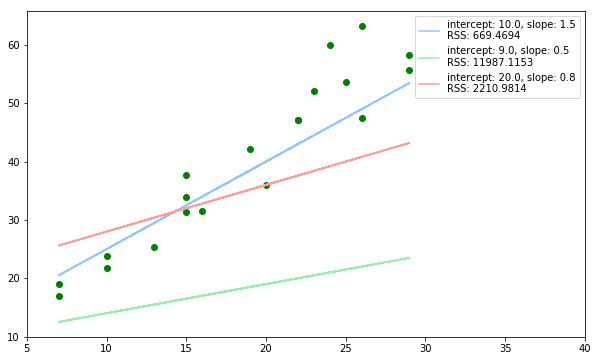

In [77]:
#Set the size of the plot
fig = plt.figure(figsize=(10, 6))
#Graph our observations in green 
plt.scatter(tips, Y, color='green')
#Set the limit of x to 40 so there is space for our legend
plt.xlim(5, 40)
#We are going to use a for loop to plot 3 different lines with different intercepts and slopes
for b0, b1 in [(10, 1.5), (9, .5), (20, .8)]:
    #Find the error of each one of the 3 lines fallowing the formula
    error = Y - (b0 + b1 * tips)
    #Create a text with the b0 and b1 of this loop along with the RSS of this line (fallowing the formula)
    #NOTE = When printing a text with multiple floats or strings, etc... make sure that you conver the 
    #values in tuples as below.
    text = 'intercept: %.1f, slope: %.1f\nRSS: %.4f' %(b0, b1, np.sum(error**2))
    #Plot the line and the lebel
    plt.plot(tips, b0 + b1 * tips, label=text)
#Plot the legent
plt.legend()
#Lets see 
plt.show()

Excelent! Just what we expected. We see that the blue line which is the line that is most similar to the points it is the one with the lowest **RSS** and by far! the green line with our made up values didnt do so well huh.  

Now, it is very important to start digging into what really minimizes our **RSS**. As we mentioned before in a problem all that we are given to is the $Y$ and $X$ observations. We just shown that what minimizes the **RSS** hence plotes a line the most similar to the observations is choosong $\beta_0$ and $\beta_1$ correctly.    

The coefficients that really minimize the **RSS** are  $\hat{\beta_0}$ and $\hat{\beta_1}$. The hat or ^ means estimated value, and they are mormally called the **OLS** or **Ordinary Least Squares Estimators**. The formula is denoted as fallows:

$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X$$

Once we have the estimators, we can get the corresponding $Y$ by passing the $X$ values to the formula above.

**But now how do we actually get the OLS?**

The formulas on how to get both:

$$
\begin{align}
\text{ }\\
\hat{\beta}_1&=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}
\\
\hat{\beta}_0&=\bar{y}-\hat{\beta}_1\bar{x}\\
\end{align}
$$

Where $\bar{x}$ and $\bar{y}$ are the sample means of $x_i$ and $y_i$ respectively.

**Wait do not worry** if you dont care so much for math because that is why we have scikit-learn to do all this work for us.  

# Evaluating a model


Before we dive into $R^2$ we need to introduce another key element on how to estimate the overall accuracy of a model. The **TSS** or **Total Sum of Squares**. Denoted by: 

$$TSS=\sum_{i=1}^{n}(y_i-\bar{y})^2$$

Where $\bar{y}$  is the sample mean of $y_i$

It represents the squared residuals with respect to the average value of the observations (as opposed to the **RSS** which represents the squared residuals with respect to the linear regression) Lets visualize an example below.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg" style="width: 500px;">

# $R^2$ = Coefficient of Determination

The most common way to evaluate the overall accuracy of a simple linear model is to use the $R^2$. The $R^2$ measures how well a model fits the data, it is described as:
$$R^2=1-\frac{RSS}{TSS}$$
Hence 0<$R^2$<1 where:

-$R^2$ = 1 Means that the model fits the data perfectly, there is no error.

-$R^2$ = 0 Means that the model fits the data no better than the null model or $y$ = $\bar{y}$

So the closer that the $R^2$ is to 1, the better the model fits the data. 

### Lets wrap it up with our examples
Lets recall our two tips examples. The one where our line fits the observations very well, lets call it "Good model". The one where our line does not fits the observations very well, lets call it "Not so good model". Now lets use what we learned to actually evaluate the accuracy of these two models using the $R2$.

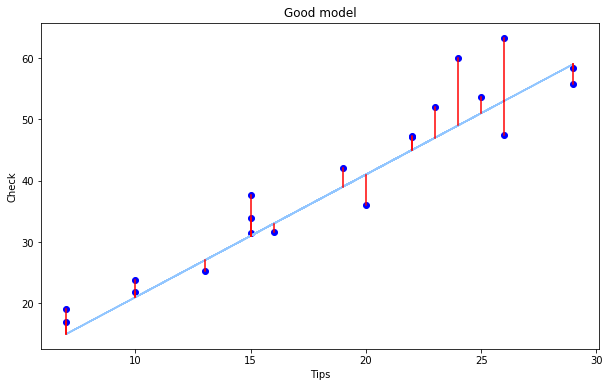

In [78]:
#If this code below confuses you, you can scroll up, the code is explained line by line earlier in the notebook. 
figure = plt.figure(figsize=(10, 6))
plt.title('Good model')
plt.scatter(tips, Y, color='blue')
plt.plot(tips, B_0+B_1*tips)
for i in range(20):
    plt.plot([tips[i], tips[i]], [B_0+B_1*tips[i], Y[i]], color='red')
plt.xlabel('Tips')
plt.ylabel('Check')
plt.show()

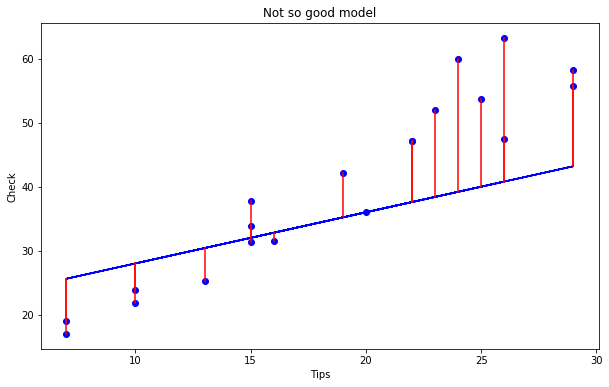

In [52]:
#If this code below confuses you, you can scroll up, the code is explained line by line earlier in the notebook. 
figure = plt.figure(figsize=(10, 6))
plt.title('Not so good model')
plt.scatter(tips, Y, color='blue')
plt.plot(tips, b0 + b1 * tips, color='blue')
for i in range(20):
    plt.plot([tips[i], tips[i]], [b0+b1*tips[i], Y[i]], color='red')
plt.xlabel('Tips')
plt.ylabel('Check')
plt.show()

Lets remember that the difference between these two models are the coefficients ($\beta_0, \beta_1$) which are the values that minimize our **RSS** and give us optimal **$R^2$**.

That bein said, the variables for our Good model are: Y, B_0, B_1 and tips. For our Not so good model the varianles are: Y, b0, b1 and tips. Lets evaluate the models 

In [89]:
#Fallowing our formula for the RSS lets name the RSS of the good model Grss
Grss = np.sum((Y- B_0 - B_1 * tips)**2)
#Fallowing our formula for the TSS lets name the TSS of the good model Gtss
Gtss = np.sum((Y - np.mean(y))**2)
#Fallowing our formula for the R^2 lets name the R^2 of the good model Gr2
Gr2 = 1 - Grss/Gtss
#Again, fallowing our formula for the RSS lets name the RSS of the not so good model Nrss
Nrss = np.sum((Y - b0 - b1 * tips)**2)
#Again, fallowing our formula for the TSS lets name the TSS of the not so good model Ntss
Ntss = np.sum((Y - np.mean(y))**2)
#Again, fallowing our formula for the R^2 lets name the R^2 of the not so good model Nr2
Nr2 = 1 - Nrss/Ntss

#Are you excited as I am to see the ressults?
#Lets print all the outcomes!
print('*'*100)
print('RSS of the good model = %.4f' %Grss)
print('RSS of the not so good model = %.4f' %Nrss)
print('R^2 of the good model = %.4f' %Gr2)
print('R^2 of the not so good model = %.4f' %Nr2)
print('*'*100)
print('We see that the RSS of our good model %.4f is significantly lower than the RSS \
of our not so good model %.4f. This means that our Good model is a better fit, and indeed \
the R^2 of our good model %.4f is a lot closer to 1 than the R^2 from the not so good model \
%.4f. We were able to prove it.' %(Grss, Nrss, Gr2, Nr2))
print('*'*100)

****************************************************************************************************
RSS of the good model = 432.1427
RSS of the not so good model = 2210.9814
R^2 of the good model = 0.9065
R^2 of the not so good model = 0.5217
****************************************************************************************************
We see that the RSS of our good model 432.1427 is significantly lower than the RSS of our not so good model 2210.9814. This means that our Good model is a better fit, and indeed the R^2 of our good model 0.9065 is a lot closer to 1 than the R^2 from the not so good model 0.5217. We were able to prove it.
****************************************************************************************************


# Scikit-Learn

Its time to use this awesome library to do all the work for us. Lets start by recalling the observations of our tips exercise, then we will let the Scikit-learn find the best coefficients ($\beta_0, \beta_1$) for the problem. 

Its time to see how far off if any was our good model from the actual best fit.

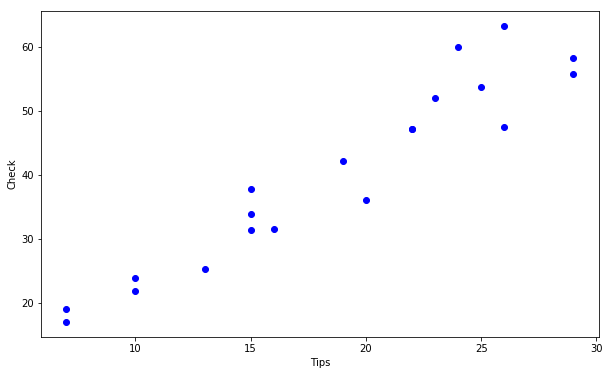

In [30]:
#If this code below confuses you, you can scroll up, the code is explained line by line earlier in the notebook.
np.random.seed(18)
tips = np.random.randint(5,30,20)
B_0 = 1
B_1 = 2
np.random.seed(18)
E= np.random.normal(0, 5, 20)
Y = B_0 + B_1*tips + E
figure = plt.figure(figsize=(10, 6))
plt.scatter(tips, Y, color='blue')
plt.xlabel('Tips')
plt.ylabel('Check')
plt.show()

Lets import **linear_model** from **sklearn**. Then we can proceed to create a linear regression instance which uses the **OLS** method to fit a linear model. 

See below some attributes and methods we will use for linear regression:

- `coef_`: Estimated coefficients ($\hat{\beta}_1$,...) for the linear regression problem.
- `intercept_`: Independent term ($\hat{\beta}_0$) in the linear model.
- `fit(X, y)`: Fit linear model.
- `predict(X)`: Predict using the linear model
- `score(X, y)`: Returns the coefficient of determination $R^2$ of the prediction.

Taken from the sklearn docs http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html. 

In [11]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

Attributes and methods may deffer in different versions of scikit-learn. You can find the current version's by using Python's "magic" command, which is just adding a question mark after your variable, class or function. Lets try it out.

In [12]:
ols?

### Lets fit the model and predict 

In [25]:
#To start we want to reshape our X into a (i, 1) matrix or just one column.
#In this case I renamed out tips to just X for convenience. 
X = tips.reshape(-1,1)
#Fit the model using our linear regression instance and use the fit attribute. 
ols.fit(X, Y)
#Use the intercept_ attribute to get the intercept/Beta_0
print('Beta_0 = %.4f' %ols.intercept_)
#Use the coef_ attribute to get the slope/Beta_1
print('Beta_1 = %.4f' %ols.coef_)
#Use the score(X, Y) attribute to get the R^2
print('R^2 = %.4f' %ols.score(X, Y))
#Here we will remember the formula for the RSS with the help of the predict(X) attribute
print('RSS = %.4f' %np.sum((Y - ols.predict(X))**2))

Beta_0 = 3.4004
Beta_1 = 1.9748
R^2 = 0.9108
RSS = 356.9822


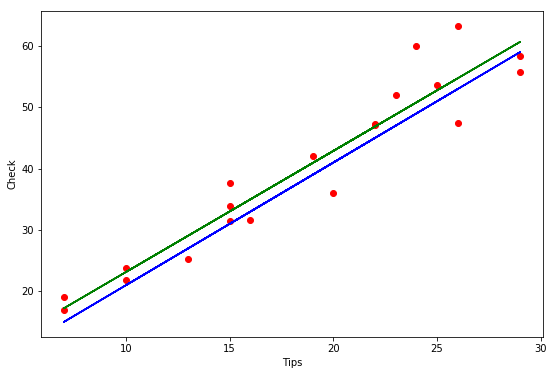

In [34]:
#Set the size of the plot
figure = plt.figure(figsize=(9, 6))
#Plot our observations
plt.scatter(tips, Y, color='red')
#Plot the original line in blue
plt.plot(tips, B_0+B_1*tips, color='blue')
#Plot the predicted line in green
plt.plot(tips, ols.predict(X), color='green')
# X and Y lebels
plt.xlabel('Tips')
plt.ylabel('Check')
#Lets go!
plt.show()